## Quais dados coletar
Server:
- Acc
- Loss
- Round
- Amount of selected clients per round
- Amount of not selected clients per round
##Client:
### 'round', 'cid', 'acc', 'loss', 'model_size', 'participate', 'selected'
- Acc
- Loss
- Round
- Engaged
- Model size


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

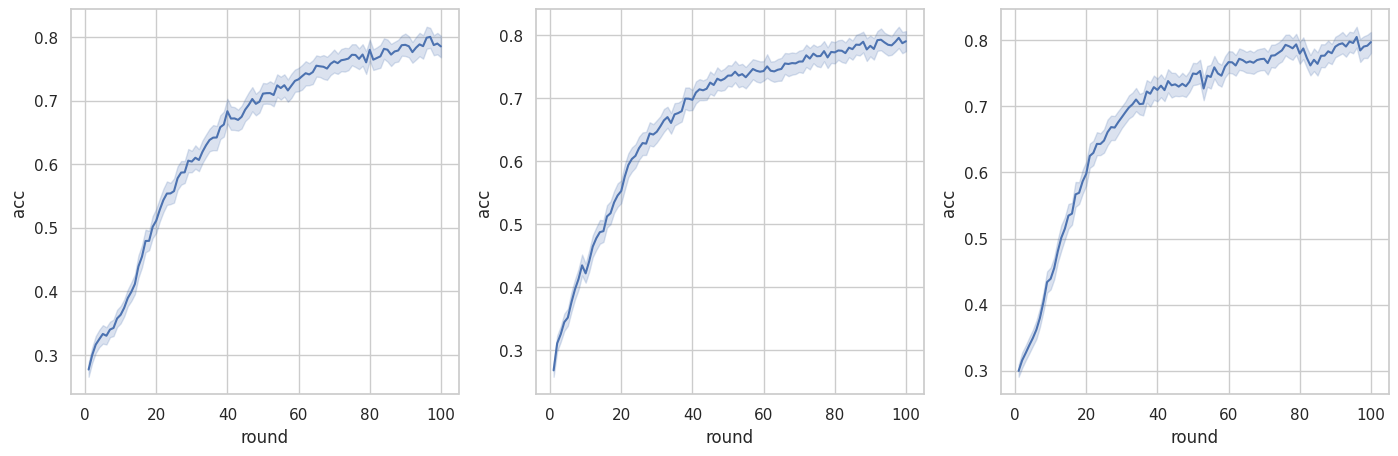

In [44]:
# 1,24,0.3149999976158142,8.606746673583984,True,selected
avg = [
    pd.read_csv('logs/avg/MNIST/50/engaged_0.25/dirichlet_0.1/c-eval.csv', names=['round', 'cid', 'acc', 'loss', 'participate','is_selected']),
    pd.read_csv('logs/avg/MNIST/50/engaged_0.5/dirichlet_0.1/c-eval.csv', names=['round', 'cid', 'acc', 'loss', 'participate','is_selected']),
    pd.read_csv('logs/avg/MNIST/50/engaged_0.75/dirichlet_0.1/c-eval.csv', names=['round', 'cid', 'acc', 'loss', 'participate','is_selected'])
]
def plot_acc(df, ax):
    sns.lineplot(data=df,ax=ax,x='round',y='acc')
fig, ax = plt.subplots(1,3, figsize=(17,5))
for i, df in enumerate(avg):
    plot_acc(df, ax[i])

## KDEPLOT - Clientes selecionados

/tmp/ipykernel_2586222/3764184622.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecionados['Status'] = selecionados['participate'].apply(lambda x: 'Participou' if x else 'Não Participou')


Text(0, 0.5, 'Densidade')

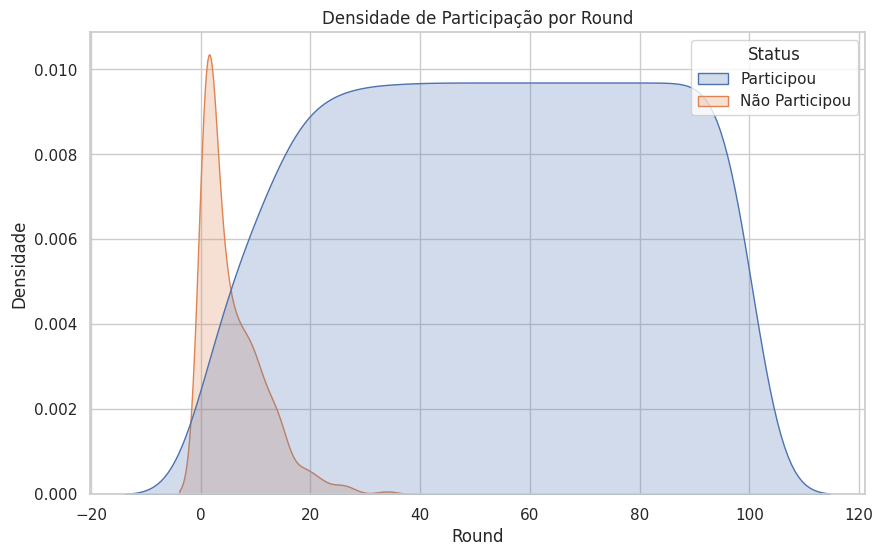

In [10]:
df  = pd.read_csv('logs/avg/MNIST/50/engaged_0.25/dirichlet_0.1/c-bw.csv', names=['round', 'cid', 'size', 'participate', 'is_selected'])


# Filtra para incluir apenas os clientes que foram selecionados
selecionados = df[df['is_selected'] == 'selected']

# Cria uma nova coluna para facilitar a visualização
selecionados['Status'] = selecionados['participate'].apply(lambda x: 'Participou' if x else 'Não Participou')

# Configura o estilo do gráfico
sns.set(style="whitegrid")

# Cria o gráfico KDE
plt.figure(figsize=(10, 6))
ax = sns.kdeplot(data=selecionados, x='round', hue='Status', fill=True)
ax.set_title('Densidade de Participação por Round')
ax.set_xlabel('Round')
ax.set_ylabel('Densidade')

## KDEPLOT - Clientes não Selecionados

/tmp/ipykernel_2586222/606467320.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selecionados['Status'] = selecionados['participate'].apply(lambda x: 'Participou' if x else 'Não Participou')


Text(0, 0.5, 'Densidade Estimada')

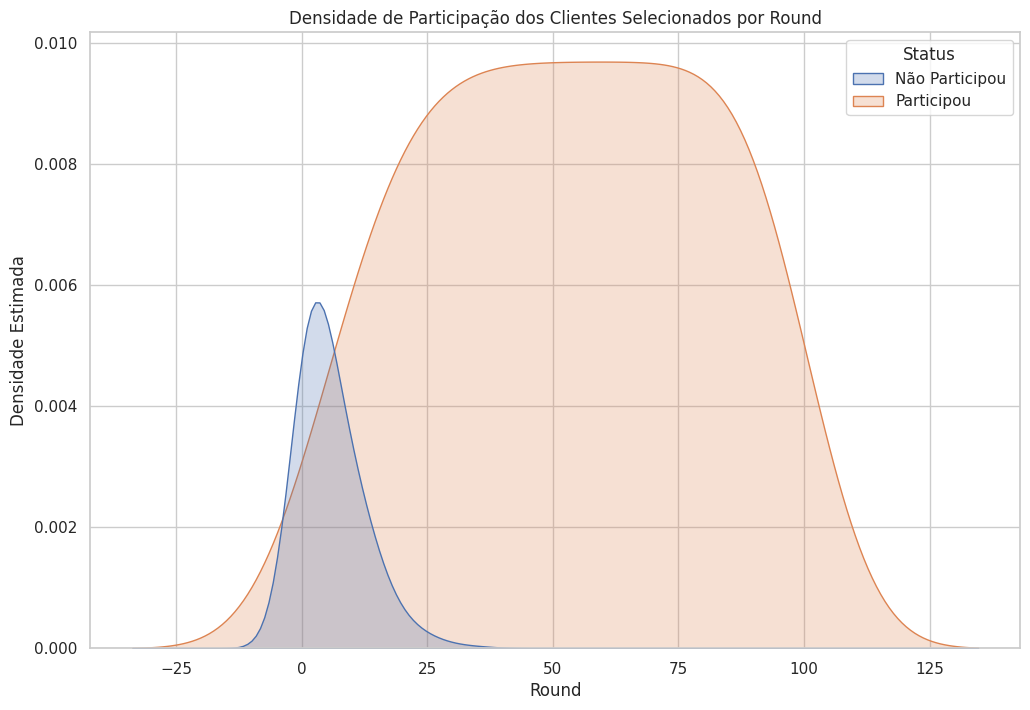

In [29]:
df  = pd.read_csv('logs/avg/MNIST/50/engaged_0.25/dirichlet_0.1/c-bw.csv', names=['round', 'cid', 'size', 'participate', 'is_selected'])


# Filtra para incluir apenas os clientes que foram selecionados
selecionados = df[df['is_selected'] == 'selected']

# Cria uma nova coluna para facilitar a visualização
selecionados['Status'] = selecionados['participate'].apply(lambda x: 'Participou' if x else 'Não Participou')

# Calcula a contagem média de clientes por status e round, considerando 5 execuções por round
media_por_round_status = selecionados.groupby(['round', 'Status']).size().unstack().fillna(0) / 5

# Derrete o DataFrame para facilitar a plotagem com Seaborn
dados_plot = media_por_round_status.reset_index().melt(id_vars='round', value_name='Média de Clientes', var_name='Status')

# Define os limites de round
# min_round, max_round = df['round'].min(), df['round'].max()

# Cria o gráfico KDE com os limites especificados
plt.figure(figsize=(12, 8))
ax = sns.kdeplot(
    data=dados_plot, 
    x='round', 
    hue='Status', 
    weights='Média de Clientes', 
    fill=True, 
    # clip=(min_round, max_round)
)
ax.set_title('Densidade de Participação dos Clientes Selecionados por Round')
ax.set_xlabel('Round')
ax.set_ylabel('Densidade Estimada')

## HISTOPLOT - Clientes que foram selecionados e participaram participaram

Text(0, 0.5, 'Frequência')

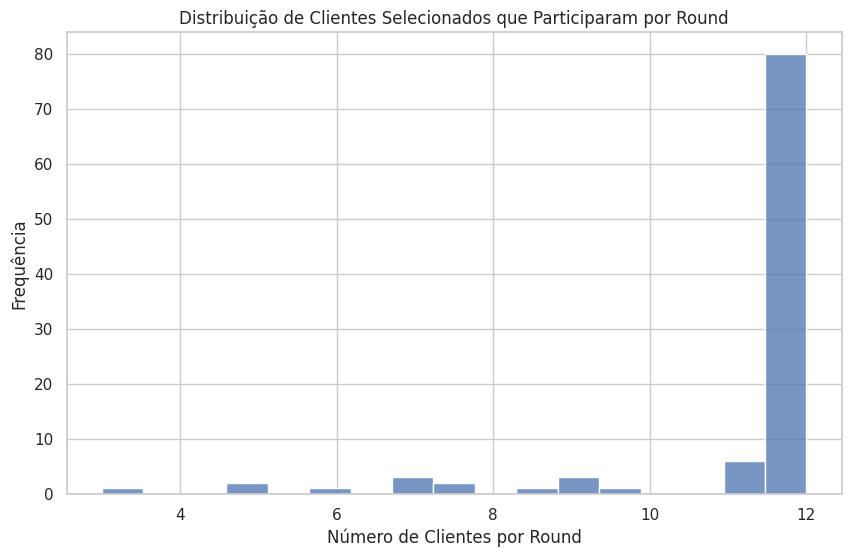

In [24]:
df  = pd.read_csv('logs/avg/MNIST/50/engaged_0.25/dirichlet_0.1/c-bw.csv', names=['round', 'cid', 'size', 'participate', 'is_selected'])
# Filtra para incluir apenas os clientes que foram selecionados e participaram
selecionados_participantes = df[(df['is_selected'] == 'selected') & (df['participate'] == True)]

# Conta quantos clientes participaram em cada round
contagem_por_round = selecionados_participantes.groupby('round').size() /5

# Configura o estilo do gráfico
sns.set(style="whitegrid")

# Cria o histograma
plt.figure(figsize=(10, 6))
ax = sns.histplot(contagem_por_round, bins=len(contagem_por_round.unique()), kde=False)
ax.set_title('Distribuição de Clientes Selecionados que Participaram por Round')
ax.set_xlabel('Número de Clientes por Round')
ax.set_ylabel('Frequência')

## HISTOPLOT - Clientes que foram selecionados e NÃO participaram participaram

Text(0, 0.5, 'Frequência')

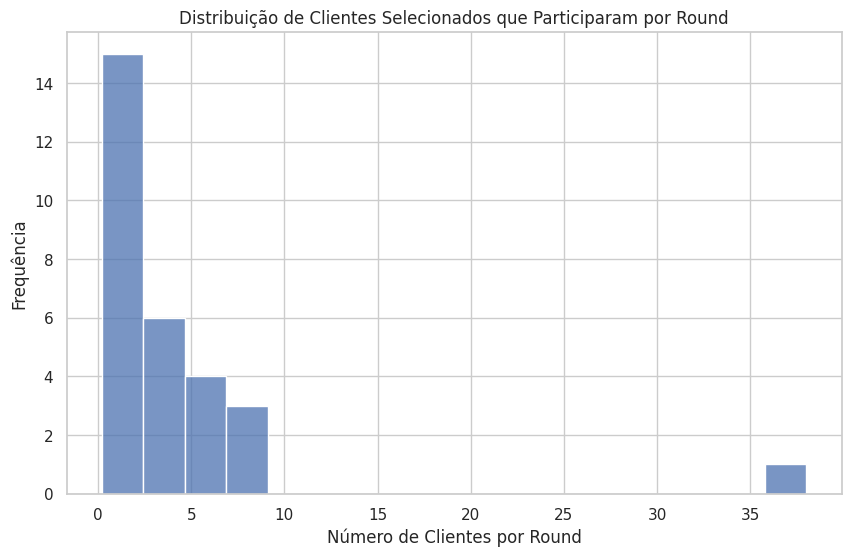

In [25]:
df  = pd.read_csv('logs/avg/MNIST/50/engaged_0.25/dirichlet_0.1/c-bw.csv', names=['round', 'cid', 'size', 'participate', 'is_selected'])
# Filtra para incluir apenas os clientes que foram selecionados e participaram
selecionados_participantes = df[(df['is_selected'] == 'selected') & (df['participate'] == False)]

# Conta quantos clientes participaram em cada round
contagem_por_round = selecionados_participantes.groupby('round').size() /5

# Configura o estilo do gráfico
sns.set(style="whitegrid")

# Cria o histograma
plt.figure(figsize=(10, 6))
ax = sns.histplot(contagem_por_round, bins=len(contagem_por_round.unique()), kde=False)
ax.set_title('Distribuição de Clientes Selecionados que Participaram por Round')
ax.set_xlabel('Número de Clientes por Round')
ax.set_ylabel('Frequência')

<!-- ## HISTOPLOT - Clientes que foram selecionados e NÃO participaram participaram -->

In [131]:
df  = pd.read_csv('logs-com-troca/deev/deev/MNIST/50/engaged_0.5/dirichlet_0.1/c-bw.csv', names=['round', 'cid', 'size', 'participate', 'is_selected'])
selecionados_participantes = df[(df['is_selected'] == 'selected') & (df['participate'] == True)]
selecionados_nao_participantes = df[(df['is_selected'] == 'selected') & (df['participate'] == False)]

# Agrupar por round e calcular a quantidade de clientes selecionados que participaram
quantidade_selecionados_participantes_por_round = selecionados_participantes.groupby('round').size()
quantidade_selecionados_participantes_por_round *= selecionados_participantes['size'].iloc[0]
# quantidade_selecionados_participantes_por_round


quantidade_selecionados_nao_participantes_por_round = selecionados_nao_participantes.groupby('round').size()
# quantidade_selecionados_nao_participantes_por_round *= selecionados_nao_participantes['size'].iloc[0]
quantidade_selecionados_nao_participantes_por_round

# plt.figure(figsize=(12, 8))
# ax = sns.barplot(x=quantidade_selecionados_nao_participantes_por_round.index, y=quantidade_selecionados_nao_participantes_por_round.values, color='blue',errorbar='ci')
# ax.set_title('Desperdicio de banda médio por round')
# ax.set_xlabel('Round')
# ax.set_ylabel('Desperdício de banda (bytes)')



round
1     125
2      73
3      15
4      13
5       9
6       5
7       2
8       5
9       2
10      2
11      4
12      1
13      1
14      1
16      1
dtype: int64

In [76]:
df_c

,,participate
round,participate,
1,False,125
2,False,125
3,False,54
4,False,43
5,False,32
6,False,24
7,False,19
8,False,17
9,False,12


,size,cid,media_size
round,,,
1,55573000,125,444584.0
2,55573000,125,444584.0
3,24007536,54,444584.0
4,19117112,43,444584.0
5,14226688,32,444584.0
6,10670016,24,444584.0
7,8447096,19,444584.0
8,7557928,17,444584.0
9,5335008,12,444584.0


round
1     125
2     125
3      54
4      43
5      32
6      24
7      19
8      17
9      12
10     10
11      8
12      4
13      3
14      2
15      1
16      1
Name: cid, dtype: int64